# Machine Learning Online Class Exercise 7 | Principle Component Analysis and K-Means Clustering

In [241]:
import numpy as np
import pandas as pd
import random
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib import image as img
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

sns.set(font_scale=1.3)

## Principal component analysis (PCA)
The goal of PCA is to reduce the dimensionality of the problem by projecting the points $x_i\in\mathbb{R}^D$ on a subspace $U$ in $\mathbb{R}^M$, where $M<D$ and the perpendicular distance of every $x_i$ to said subspace is as small as possible. Such a process can be considered to be a compression, and the idea is to lose as little information from the original data as possible while reducing the degrees of freedom of the problem. That is, if $z_i$ are the compressed coordinates (projections over the subspace $U$) and $\tilde{x}_i$ the uncompressed coordinates, we have $x_i\rightarrow z_i\rightarrow \tilde{x}_i$, and we want to minimize $|x_i-\tilde{x}_i|^2$.<br>
Let $B$ be the projection operator, which lives in $\mathbb{R}^{D\times M}$, then
$$z_i=B^Tx_i,$$
and
$$\tilde{x}_i=Bz_i.$$
Retaining most information after data compression is equivalent to capturing the largest amount of variance in the low-dimensional code. The data covariance matrix, for data with mean $\mu=0$ is given by
$$\text{Cov}[x]=\frac{1}{m}\sum_{i=1}^mx_ix^T_i,$$
and tough the variance does not depend on the mean it is convenient to center the data around 0 before compressing it to make calculations easier. <br><br>

The $M$ columns of the projection matrix are the basis vectors for the subspace $U$ in the original space
$$B=[b_1,b_2,\dots,b_{M}],$$
where $b_l\in\mathbb{R}^D$ and $|b_l|^2=1$.<br><br>

Now, the variance of the data along the axis descibed by vector $b_1$ is given by
\begin{align}
V_1&=\frac{1}{m}\sum_{i=1}^mz_{1,i}^2\\
&=\frac{1}{m}\sum_{i=1}^m(b_1^Tx_i)^2\\
&=\frac{1}{m}\sum_{i=1}^mb_1^Tx_ix_i^Tb_1\\
&=b_1^T\text{Cov}[x]b_1,
\end{align}
which gives us the optimization problem
\begin{align}
&\max_{b_1}b_1^T\text{Cov}[x]b_1,\\
&\text{subject to }|b_1|^2=1.
\end{align}
Using the method of Lagrange multipliers we obtain the lagrangian
$$\mathcal{L}(b_1,\lambda_1)=b_1^T\text{Cov}[x]b_1+\lambda_1(1-b_1^Tb_1),$$
which after differentiating and equationg to 0 gives the equations
\begin{align}
\text{Cov}[x]b_1&=\lambda_1 b_1,\\
b_1^Tb_1&=1,
\end{align}
which shows that $b_1$ is an eigenvector of the centered data covariance matrix, with an eigenvalue equal to the variance $\lambda_1=V_1$. Therefore, to maximize the variance we have to look for the eigenvector of the data covariance with the largest eigenvalue. This eigenvector is called *first principal component*. To estimate the contribution of the principal component we can obtain 
$$\frac{1}{m}\sum_{i=1}^m|\tilde{x}_i-x_i|^2,$$
where $\tilde{x}_i=b_1z_{i,1}$.<br><br>

We can also find an $M$ dimensional subspace in which variance is maximized. Assume we have already found the first $l-1$ principal components.
Define the centered data matrix as
$$X=[x_1,x_2,\dots,x_m]\in\mathbb{R}^{D\times m},$$
and the projection operator
$$B_{l-1}=\sum_{k=1}^{l-1}b_kb_k^T.$$
Then, obtain a new data matrix is
$$\hat{X}=X-B_{l-1}X,$$
which holds the information that is left out after the projection onto the subspace of dimension $l-1$ is made. To find the $l$th principal component we have to find the eigenvector of $\hat{X}$ with the highest eigenvalue $$V_l=\frac{1}{m}b_l^T\hat{X}^T\hat{X}b_l=b_l^T\text{Cov}[\hat{X}]b_l,$$
with the constraint $|b_l|^2=1$, which is also an eigenvector of $\text{Cov}[X]$. Eigenvectors $V_1,\dots,V_{l-1}$ of $\text{Cov}[X]$ are also eigenvectors of $\text{Cov}[\hat{X}]$, but with eigenvalue 0. The maximum amount of variance captured by the PCA in the $M$th dimensional subspace is
$$V_M=\sum_{k=1}^M\lambda_k$$
where $\lambda_k$ are the $M$ largest eigenvalues of $\text{Cov}[X]$. The variance lost due to the compression via PCA is
$$J=\sum_{j=M+1}^D\lambda_j=V_D-V_M,$$
but sometimes people also use the relative loss
$$J_r=\frac{V_D-V_M}{V_D}=1-\frac{V_M}{V_D}.$$
<br>
### Steps of PCA
1. Mean substraction to have the data centered.
2. Standarization to have the data dimensions in the same range.
3. Eigendecomposition of the covariance matrix.
4. Projection onto the subspace.

### How to choose the dimension $M$ of the subspace?
A rule of thumb is to choose the smallest $M$ such that "99\% of the variance is still retained". That is, the relative variance loss is
$$J_r\leq0.01.$$

## ================== Part 1: Load Example Dataset  ===================

In [3]:
data = loadmat("ex7data1.mat")
X = data['X']
X.shape

(50, 2)

In [4]:
X_df = pd.DataFrame(X, columns=['x', 'y'])

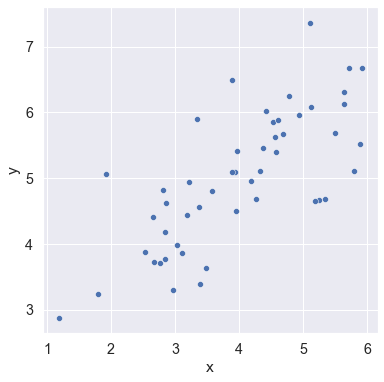

In [5]:
fig0, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=X_df, ax=ax, x='x', y='y')

## =============== Part 2: Principal Component Analysis ===============

In [11]:
#Normalize data
Xnrm_df = X_df.apply(lambda x: x-np.mean(x))
Xnrm_df = Xnrm_df.apply(lambda x: x/np.std(x))
Xnrm_df.head()

,x,y
0,-0.523313,-1.592793
1,0.463815,0.840345
2,-1.148393,-0.583159
3,-1.054054,-1.270718
4,-0.984022,-0.816584


In [14]:
Xnrm = Xnrm_df.to_numpy()
Xnrm.shape

(50, 2)

In [22]:
#Principal component analysis
def pca(X):
    cov = np.matmul(X.T,X) / X.shape[0] 
    e_val, e_vec = np.linalg.eig(cov) #eigenvectors are the columns of e_vec
    return e_val, e_vec

In [37]:
vals, vecs = pca(Xnrm)
vals, vecs

(array([1.73553038, 0.26446962]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [58]:
means = np.mean(X_df)
print(means)

x    3.989265
y    5.002806
dtype: float64


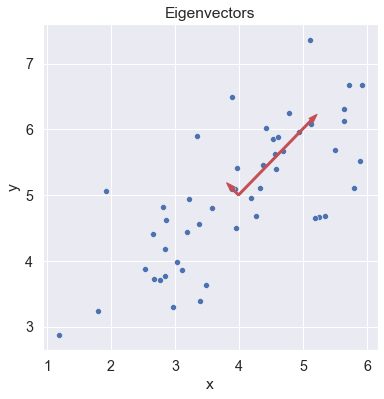

In [65]:
fig1, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=X_df, ax=ax, x='x', y='y').set(title='Eigenvectors')
ax.arrow(means[0],means[1],vecs[0,0]*vals[0],vecs[1,0]*vals[0],color='r',length_includes_head=True,width=0.03)
ax.arrow(means[0],means[1],vecs[0,1]*vals[1],vecs[1,1]*vals[1],color='r',length_includes_head=True,width=0.03)

## =================== Part 3: Dimension Reduction ===================

In [156]:
#Project the data onto K dimensions
def projectData(X, B, K):
    Z = np.matmul(X,B[:,:K])
    return Z

#Recover data from projections (looses the part perpendicular to the subspace)
def recoverData(Z, B, K):
    Xrec = np.matmul(Z,B[:,:K].T)
    return Xrec

In [153]:
Z = projectData(Xnrm, vecs, 1)
Z.shape

(50, 1)

In [154]:
Xproj = recoverData(Z, vecs, 1)
Xproj_df = pd.DataFrame(Xproj, columns=['x', 'y'])

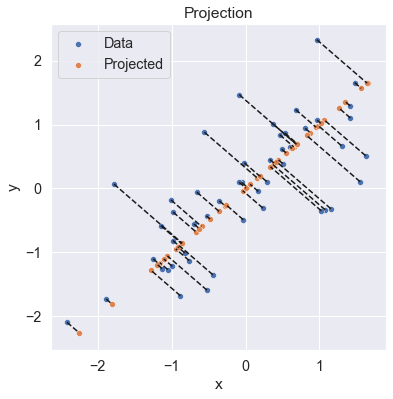

In [155]:
fig2, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=Xnrm_df, ax=ax, x='x', y='y', label='Data').set(title='Projection')
sns.scatterplot(data=Xproj_df, ax=ax, x='x', y='y', label='Projected')
for i in range(Xnrm.shape[0]):
    ax.plot((Xnrm[i,0],Xproj[i,0]),(Xnrm[i,1],Xproj[i,1]), linestyle='--', color='k')

In [174]:
#Compute the relative loss using the eigenvalues
def relativeLoss(eigv, K):
    Vtot = eigv.sum()
    Vk = eigv[:K].sum()
    return 1-Vk/Vtot

In [181]:
Jr = relativeLoss(vals, 1)
print("The relative loss of variance due to PCA was {0:0.2f}%".format(Jr*100))

The relative loss of variance due to PCA was 13.22%


## =============== Part 4: Loading and Visualizing Face Data =============

In [105]:
dataf = loadmat("ex7faces.mat")
Xf = dataf['X']
Xf.shape

(5000, 1024)

In [112]:
#randomly select 100 data points to display
rand_indices = random.sample(range(Xf.shape[0]), 100)
sel = Xf[rand_indices,:]
sel.shape

(100, 1024)

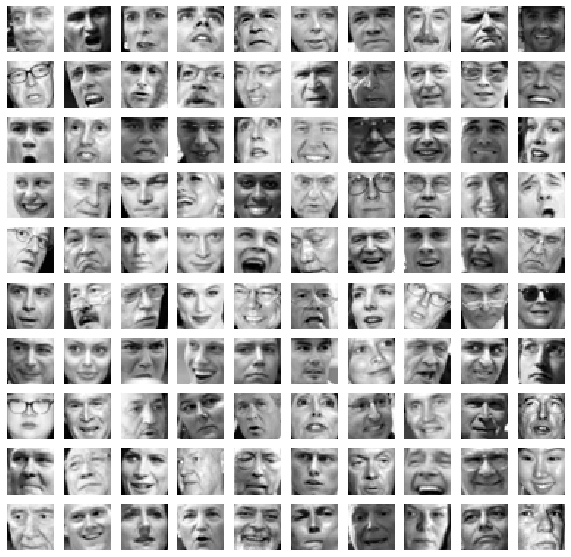

In [119]:
#Display the data as images
fig3, ax = plt.subplots(10,10,figsize=(10, 10))
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(sel[10*i+j].reshape(32,32, order='F'), cmap='gray')#order 'F' orders by column, like fortran
        ax[i][j].axis('off')


## =========== Part 5: PCA on Face Data: Eigenfaces  ===================

In [120]:
Xf_df = pd.DataFrame(Xf)
Xf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-37.866314,-45.866314,-53.866314,-51.866314,-40.866314,-33.866314,-47.866314,-37.866314,-22.866314,-7.866314,...,-91.866314,-113.866314,-123.866314,-102.866314,-84.866314,-94.866314,-99.866314,-110.866314,-111.866314,-99.866314
1,8.133686,-0.866314,-8.866314,-15.866314,-17.866314,-16.866314,-15.866314,-21.866314,-42.866314,-28.866314,...,-47.866314,-54.866314,-54.866314,-59.866314,-74.866314,-86.866314,-70.866314,-34.866314,-8.866314,0.133686
2,-32.866314,-34.866314,-36.866314,-18.866314,6.133686,15.133686,-1.866314,-31.866314,-1.866314,13.133686,...,-36.866314,-41.866314,-46.866314,-51.866314,-73.866314,-96.866314,-105.866314,-110.866314,-111.866314,-111.866314
3,-84.866314,-64.866314,-47.866314,-42.866314,-38.866314,-28.866314,-17.866314,-11.866314,-10.866314,-12.866314,...,-37.866314,-38.866314,-41.866314,-45.866314,-48.866314,-55.866314,-56.866314,-56.866314,-57.866314,-53.866314
4,2.133686,6.133686,5.133686,9.133686,10.133686,11.133686,11.133686,11.133686,12.133686,12.133686,...,-42.866314,-59.866314,-72.866314,-70.866314,-68.866314,-56.866314,-30.866314,-9.866314,0.133686,-14.866314


In [121]:
# Normalize
Xfnrm_df = Xf_df.apply(lambda x: x-np.mean(x))
Xfnrm_df = Xfnrm_df.apply(lambda x: x/np.std(x))
Xfnrm_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.315240,-0.497582,-0.690584,-0.680527,-0.478828,-0.355650,-0.676605,-0.501306,-0.237445,0.014404,...,-1.595928,-1.974331,-2.100304,-1.602693,-1.180819,-1.307984,-1.344930,-1.485955,-1.439829,-1.183819
1,0.584005,0.396021,0.219164,0.055434,-0.002720,-0.001035,-0.005432,-0.165271,-0.657649,-0.427436,...,-0.675470,-0.769706,-0.717971,-0.757575,-0.987430,-1.155201,-0.800470,-0.083759,0.419813,0.585790
2,-0.217496,-0.279146,-0.346901,-0.005896,0.494088,0.666476,0.288206,-0.375293,0.203770,0.456244,...,-0.445355,-0.504280,-0.557701,-0.600344,-0.968091,-1.346180,-1.457577,-1.485955,-1.439829,-1.396172
3,-1.234034,-0.874882,-0.569284,-0.496537,-0.437427,-0.251351,-0.047381,0.044751,0.014678,-0.090796,...,-0.466275,-0.443028,-0.457532,-0.482421,-0.484618,-0.563168,-0.537627,-0.489658,-0.464871,-0.369799
4,0.466712,0.535026,0.502197,0.566518,0.576889,0.583038,0.560870,0.527802,0.497912,0.435204,...,-0.570872,-0.871793,-1.078580,-0.973768,-0.871396,-0.582266,-0.049490,0.377490,0.582306,0.320349


In [122]:
Xfnrm = Xfnrm_df.to_numpy()
Xfnrm.shape

(5000, 1024)

In [124]:
#Obtain the eigenvectors of the data set (feature combinations that maximise the variance)
fval, fvec = pca(Xfnrm)
fval.shape, fvec.shape

((1024,), (1024, 1024))

In [133]:
#36 eigenvectors with the highest eigenvalues
subf = fvec[:,:36].T
subf.shape

(36, 1024)

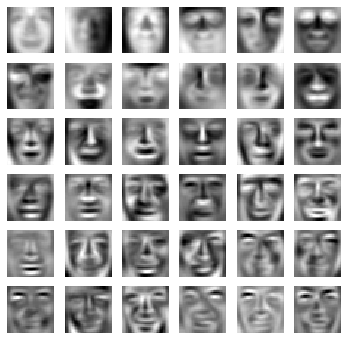

In [135]:
#Display the data as images
fig4, ax = plt.subplots(6,6,figsize=(6, 6))
for i in range(6):
    for j in range(6):
        ax[i][j].imshow(subf[6*i+j].reshape(32,32, order='F'), cmap='gray')#order 'F' orders by column, like fortran
        ax[i][j].axis('off')

## ============= Part 6: Dimension Reduction for Faces =================

In [157]:
#Proyect data on the subspace spanned by the 100 first eigenvectors
Zf = projectData(Xfnrm, fvec, 100)
print(Zf.shape)

(5000, 100)


## ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====

In [159]:
Xfproj = recoverData(Zf, fvec, 100)
Xfproj_df = pd.DataFrame(Xfproj)
Xfproj_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.240506,-0.261397,-0.301379,-0.334012,-0.327064,-0.369897,-0.454551,-0.514801,-0.521939,-0.411981,...,-1.409416,-1.516347,-1.511178,-1.454752,-1.350488,-1.162178,-0.872354,-0.548529,-0.253724,0.003906
1,0.298176,0.310197,0.280528,0.214510,0.145319,0.057432,-0.057315,-0.197357,-0.228339,-0.242917,...,-0.791716,-0.846533,-0.834236,-0.764032,-0.637744,-0.437389,-0.218169,0.022003,0.190160,0.275795
2,-0.184043,-0.184917,-0.115491,-0.004311,0.174713,0.319007,0.369873,0.334537,0.349432,0.354195,...,-0.501562,-0.635955,-0.791500,-0.917961,-1.037149,-1.168214,-1.290816,-1.374651,-1.374347,-1.309795
3,-0.561737,-0.597597,-0.542834,-0.428695,-0.273339,-0.112675,-0.077877,-0.153242,-0.276499,-0.390024,...,-0.615174,-0.599981,-0.566218,-0.514674,-0.494262,-0.487652,-0.486847,-0.498119,-0.481890,-0.451935
4,0.303442,0.401908,0.492493,0.499433,0.492214,0.573459,0.630120,0.653411,0.576766,0.448915,...,-0.704656,-0.677053,-0.648943,-0.543467,-0.428685,-0.262051,-0.031609,0.177183,0.278014,0.278099


In [162]:
#randomly select 25 data points to display
rand_indices = random.sample(range(Xfnrm.shape[0]), 25)
self = Xfnrm[rand_indices,:]
recf = Xfproj[rand_indices,:]
self.shape

(25, 1024)

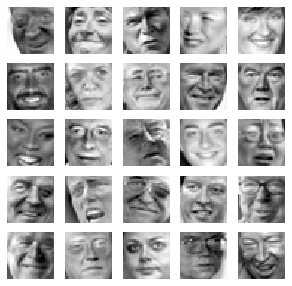

In [163]:
#Display the normalized data as images
fig5, ax = plt.subplots(5,5,figsize=(5, 5))
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(self[5*i+j].reshape(32,32, order='F'), cmap='gray')#order 'F' orders by column, like fortran
        ax[i][j].axis('off')

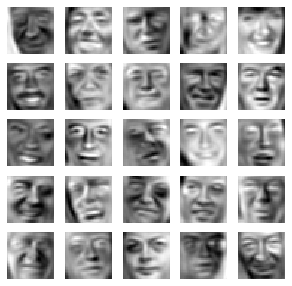

In [164]:
#Display the recovered data as images
fig6, ax = plt.subplots(5,5,figsize=(5, 5))
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(recf[5*i+j].reshape(32,32, order='F'), cmap='gray')#order 'F' orders by column, like fortran
        ax[i][j].axis('off')

In [180]:
Jfr = relativeLoss(fval, 100)
print("The relative loss of variance due to PCA was {0:0.2f}%".format(Jfr*100))

The relative loss of variance due to PCA was 6.81%


## === Part 8(a): Optional (ungraded) Exercise: PCA for Visualization ===

(128, 128, 3)

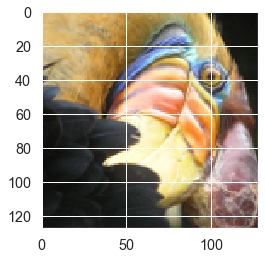

In [265]:
image = img.imread("bird_small.png")
plt.imshow(image)
image.shape

In [266]:
Xim = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
Xim.shape

(16384, 3)

In [267]:
def kMeansInitCentroids(X, K):
    centroids = np.array([[0.0 for j in range(X.shape[1])] for i in range(K)])
    for i in range(K):
        centroids[i] = np.random.random(X.shape[1])
    return centroids

In [268]:
#K most prevalen colors
K = 16
ini_cent = kMeansInitCentroids(Xim, K)
ini_cent.shape

(16, 3)

In [278]:
# Find the closest centroid to each sample
def findClosestCentroids(X, centroids):
    idx = [-1 for k in range(X.shape[0])]
    for i in range(X.shape[0]):
        md = 1.e8
        for j in range(centroids.shape[0]):
            d = np.linalg.norm(X[i]-centroids[j])
            if d < md:
                md = d
                idx[i] = j
    return np.array(idx).reshape(len(idx),1)

#Compute means based on the closest centroids
def computeCentroids(X, idx, K):
    centroids = np.array([[0.0 for j in range(X.shape[1])] for i in range(K)])
    for i in range(K):
        ind = [x[0]==i for x in idx]
        XX = X[ind]
        for j in range(X.shape[1]):
            centroids[i][j] = np.mean(XX[:,j])
    return centroids

def runkMeans(X, ini_centroids, niter):
    K = ini_centroids.shape[0]
    centroids = np.copy(ini_centroids)
    idx = []
    
    for n in range(niter):
        print("iteration {0}...".format(n))
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
    return centroids, idx

In [279]:
centroids, idx = runkMeans(Xim, ini_cent, 10)

iteration 0...


/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3256: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


iteration 1...
iteration 2...
iteration 3...
iteration 4...
iteration 5...
iteration 6...
iteration 7...
iteration 8...
iteration 9...


In [280]:
#randomly select 1000 data points to display
rand_indices = random.sample(range(Xim.shape[0]), 1000)
selec = Xim[rand_indices,:]
sidx = idx[rand_indices]
s = np.concatenate((selec,sidx), axis=1)
s_df = pd.DataFrame(s, columns=['r','g','b','id'])
s_df.head()

,r,g,b,id
0,0.521569,0.584314,0.874510,2.0
1,0.109804,0.121569,0.105882,8.0
2,0.247059,0.258824,0.235294,1.0
3,0.423529,0.313726,0.141176,1.0
4,0.674510,0.486275,0.133333,3.0


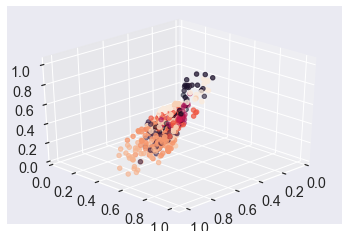

In [281]:
fig7 = plt.figure()
ax = fig7.add_subplot(111, projection='3d')
ax.scatter(s_df.r, s_df.g, s_df.b, c=s_df.id)
ax.view_init(30, 45)

## === Part 8(b): Optional (ungraded) Exercise: PCA for Visualization ===

In [282]:
#Normalize
Xim_df = pd.DataFrame(Xim, columns=['r','g','b'])
Ximn_df = Xim_df.apply(lambda x: x-np.mean(x))
Ximn_df = Ximn_df.apply(lambda x: x/np.std(x))
Ximn = Ximn_df.to_numpy()
Ximn_df.head()

,r,g,b
0,0.995894,0.86816,0.190483
1,1.126860,0.93746,0.402248
2,1.079236,0.95132,0.304510
3,1.043518,0.93746,0.223062
4,1.067330,0.85430,0.190483


In [283]:
#Obtain the eigenvectors of the data set
ival, ivec = pca(Ximn)
ival.shape, ivec.shape

((3,), (3, 3))

In [284]:
#Proyect data on the subspace spanned by the 2 first eigenvectors
Zim = projectData(Ximn, ivec, 2)
Zim_df = pd.DataFrame(Zim, columns=['z1', 'z2'])
Zim_df['id'] = idx
Zim_df.head()

,z1,z2,id
0,-1.198937,-0.581601,12
1,-1.433786,-0.504681,12
2,-1.360217,-0.554907,12
3,-1.285982,-0.595251,12
4,-1.231746,-0.622378,12


In [285]:
Zim_df['id'].unique()

array([12, 13,  3,  1,  8, 10, 14,  7, 15,  2])

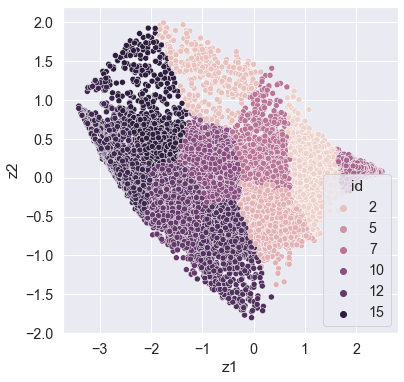

In [286]:
#Plot data on the 2D pc space
fig8, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=Zim_df, ax=ax, x='z1', y='z2', hue='id')